In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
import seaborn as sns
%matplotlib inline


In [2]:
# reading the json file with the data of the time for just object classification 
with open('data.json', 'r') as f:
    data = json.load(f)
# extracting all values from the dict
times = list(data.values())
names = list(data.keys())
# Writing vector with all the top 1 accurcy taken from the papers
ACC = [69.57,76.15,77.37,77.63,78.51, 72,77,80.1,82.9,84]

# Openingthe csv file with the data of the forward in detr training with diffrent query numbrs
queries = pd.read_csv("times.csv")
queries_val = list(queries.values)
queries_col = list(queries.columns)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


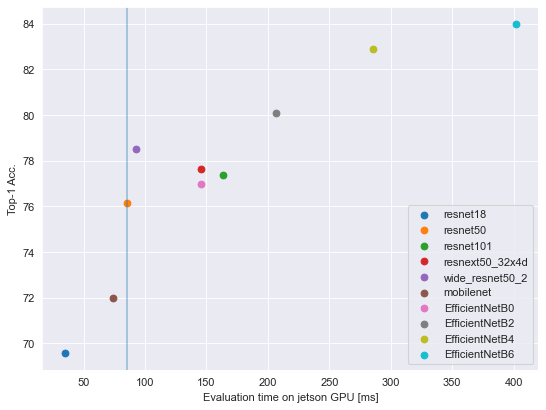

In [35]:
#scatter plot of the diffrent CNN times for object times vs top 1Acc on imageNet
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.set_style("darkgrid")
sns.scatterplot(times,ACC)
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink","tab:gray","tab:olive","tab:cyan"]
for col,a,t,n in zip(colors,ACC,times,names):
    plt.scatter(t,a,label=n,c=col)
plt.xlabel("Evaluation time on jetson GPU [ms]")
plt.axvline(x=times[1], alpha = 0.4)
plt.legend()
plt.ylabel("Top-1 Acc.");
plt.savefig("scatter_times.eps")

Text(0, 0.5, 'Evaluation time on Jetson GPU [ms]')

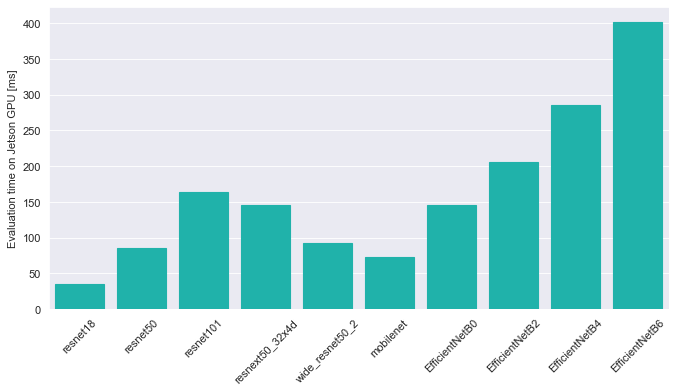

In [32]:
#barplot of object detection times with different CNNs on jetson
plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
sns.set_style("darkgrid")
eval = sns.barplot(names,times)
for item in eval.get_xticklabels():
    item.set_rotation(45)
for bar in eval.patches:
    bar.set_color("lightseagreen")
plt.ylabel("Evaluation time on Jetson GPU [ms]")

Text(0, 0.5, 'Inferance time on T4 Tesla GPU [ms]')

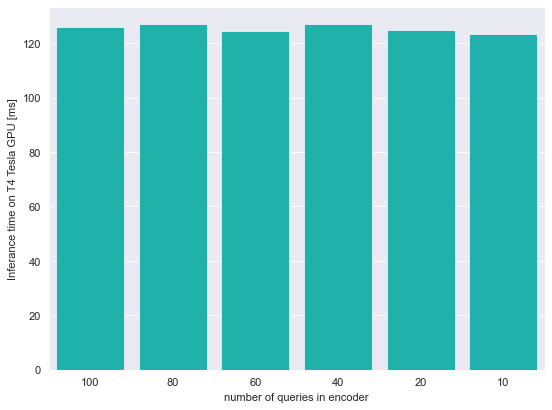

In [31]:
#barplot for hyperparameters analysis of queries on T4 tesla
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.set_style("darkgrid")
queries = sns.barplot(queries_col,list(queries_val[0]))
for bar in queries.patches:
    bar.set_color("lightseagreen")
plt.xlabel("number of queries in encoder")
plt.ylabel("Inferance time on T4 Tesla GPU [ms]")

<function matplotlib.pyplot.show(close=None, block=None)>

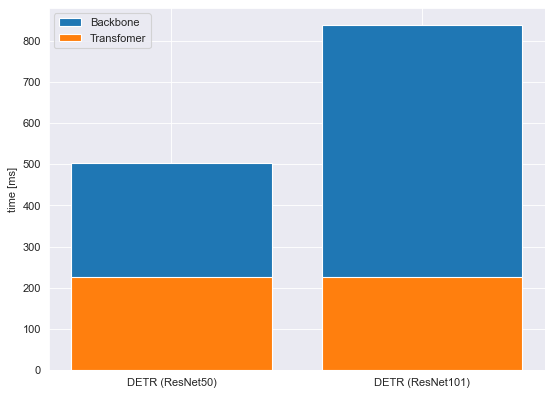

In [25]:
#data from the readme. eval times for diffrent layers detr on jetson
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
backbone_detr = [502.24, 838.08]
transformer_detr = [225.76, 225.20]
sns.set_style("darkgrid")

#
ind = np.arange(2)
p1 = plt.bar(ind,backbone_detr)
p2 = plt.bar(ind,transformer_detr)

plt.ylabel("time [ms]")
plt.xticks(ind,("DETR (ResNet50)","DETR (ResNet101)"))
plt.legend((p1[0], p2[0]), ("Backbone","Transfomer"))
plt.show